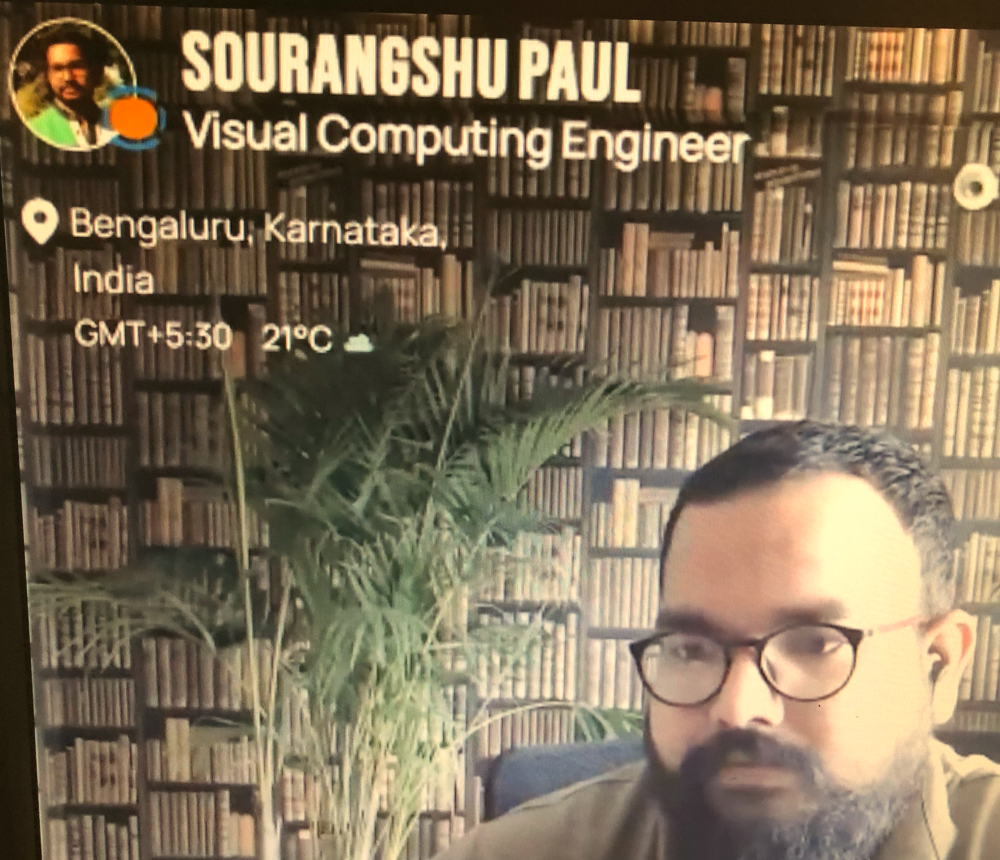


SSD: Single Shot Multibox Detector

https://arxiv.org/pdf/1512.02325.pdf

### Abstract. 
We present a method for detecting objects in images using a single
deep neural network. Our approach, named SSD, discretizes the output space of
bounding boxes into a set of default boxes over different aspect ratios and scales
per feature map location. At prediction time, the network generates scores for the
presence of each object category in each default box and produces adjustments to
the box to better match the object shape. Additionally, the network combines predictions from multiple feature maps with different resolutions to naturally handle
objects of various sizes. SSD is simple relative to methods that require object
proposals because it completely eliminates proposal generation and subsequent
pixel or feature resampling stages and encapsulates all computation in a single
network. This makes SSD easy to train and straightforward to integrate into systems that require a detection component. Experimental results on the PASCAL
VOC, COCO, and ILSVRC datasets confirm that SSD has competitive accuracy
to methods that utilize an additional object proposal step and is much faster, while
providing a unified framework for both training and inference. For 300 × 300 input, SSD achieves 74.3% mAP1
on VOC2007 test at 59 FPS on a Nvidia Titan
X and for 512 × 512 input, SSD achieves 76.9% mAP, outperforming a comparable state-of-the-art Faster R-CNN model. Compared to other single stage methods, SSD has much better accuracy even with a smaller input image size. Code is
available at: https://github.com/weiliu89/caffe/tree/ssd .

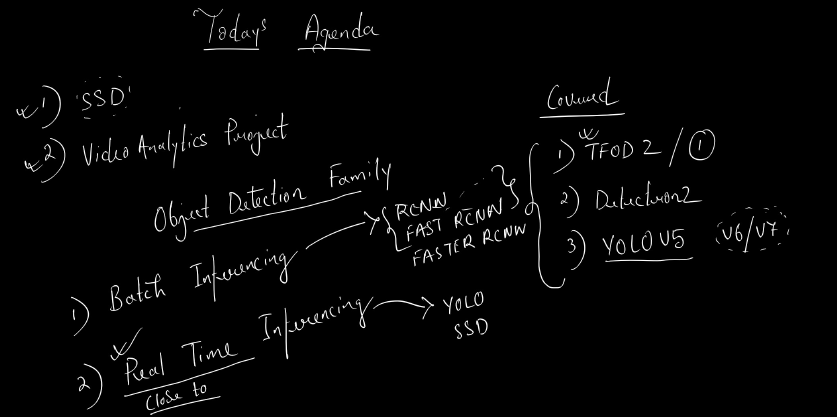

* when creating a model you need to know what is the end user, the device that will be used, the environment (day,night,artificial light) , if the model will work with batch data where you will build a report (such as traffic challenges) or if you need to work close to real time (safety and precautions) where the actions need to be taken fast

* when selecting a model a criteria frames per second is very important, anything <24 you will think there is a lag in the video, you want > 24 frames per second, in other words you are doing 24 predictions per second
* there is always a trade off between speed and accuracy, FAST RCNN models are very accurate but the speed is low whereas YOLO is fast but accuracy is lower.
* if you need accuracy go with models like FAST RCNN very strong classification bond like RESNET50 
* GPU is always fater than CPU, around 10 times faster

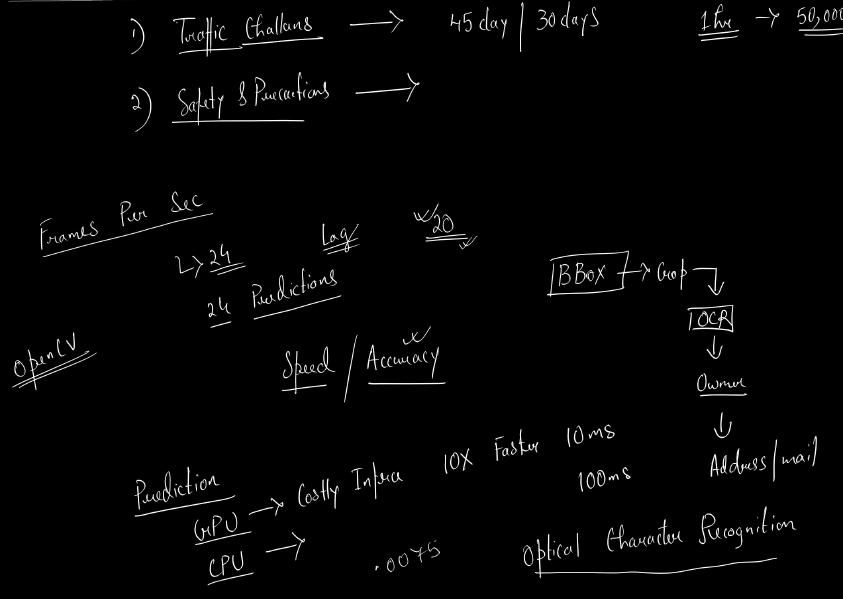

# SSD

* rcnn family finds an object by using the region proposals
* yolo works in a grid based system

* ssd uses convolutional features; 3x3 is the best convolution since nvidia has otpimized their software for it; there is also atreous convolution and dilated convolution

* RCNN uses 9 anchor boxes to deal with overlapping images

* you can use variaty of sizes of feature maps, lets say 38x38x512, 19x19x512, 9x9x512, 5x5x512. in SSD the number of bounding boxes is arount 8732 while in Fast RCNN is about 300

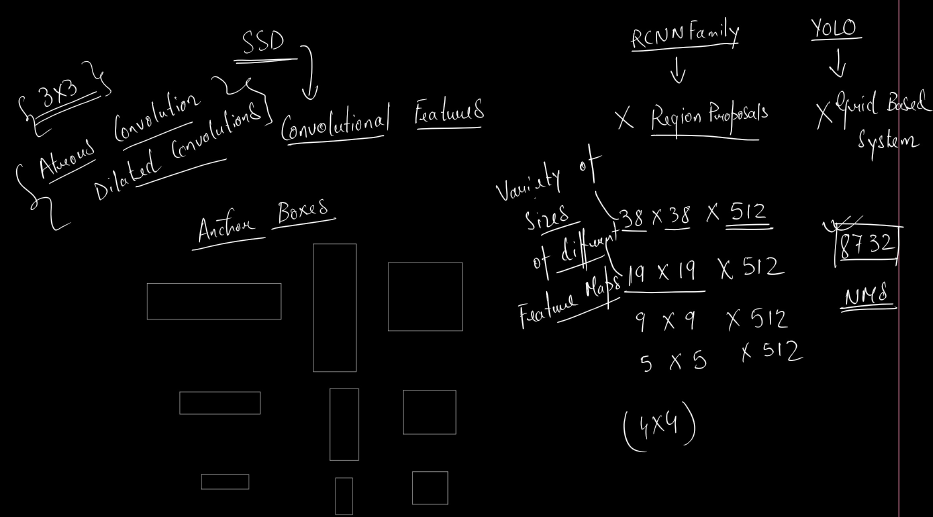

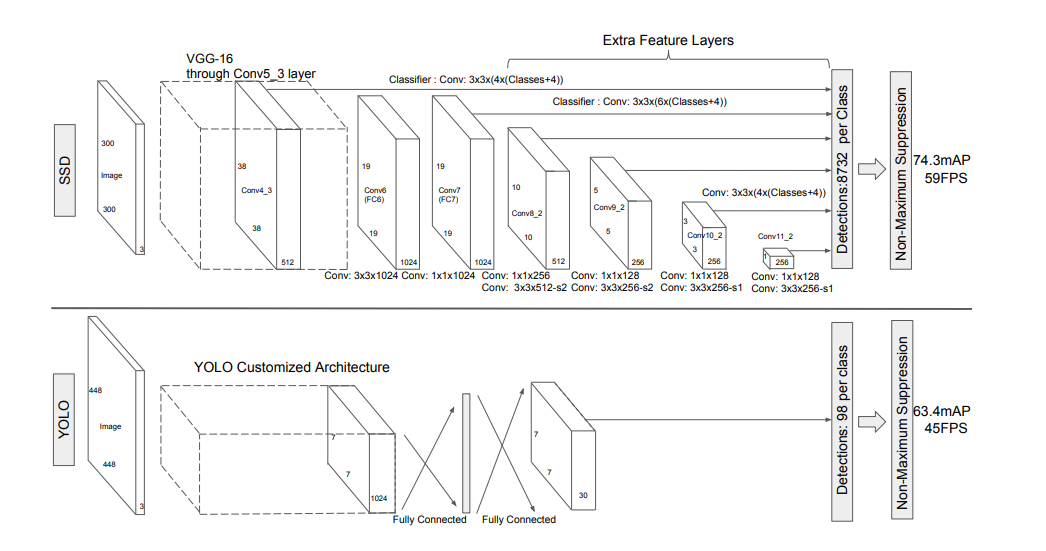

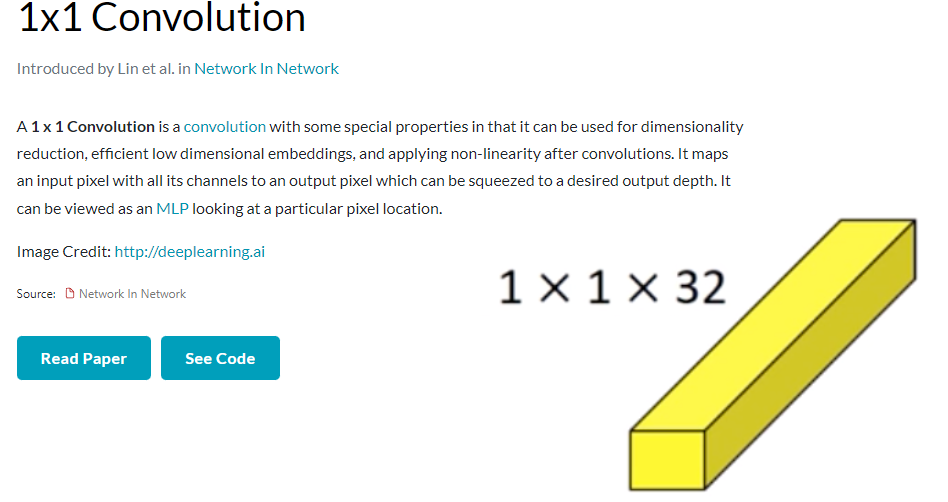

* if i have a 32x32x256
* apply a 1x1x64
* produces a 32x32x64

### why do we use 1x1 deconvolution - mainly to reduce the numbers of channels ( max pooling only reduces dimensions and not channels)

* lets assume an image 96x96x3
* apply a conv1 layer con2d(3x3,16) the output will be (94x94,16)
* apply a conv2 layer con2d(3x3,32)
* apply a conv3 layer con2d(3x3,64)
* apply a conv4 layer con2d(3x3,128)
* apply a conv5 layer con2d(3x3,256)

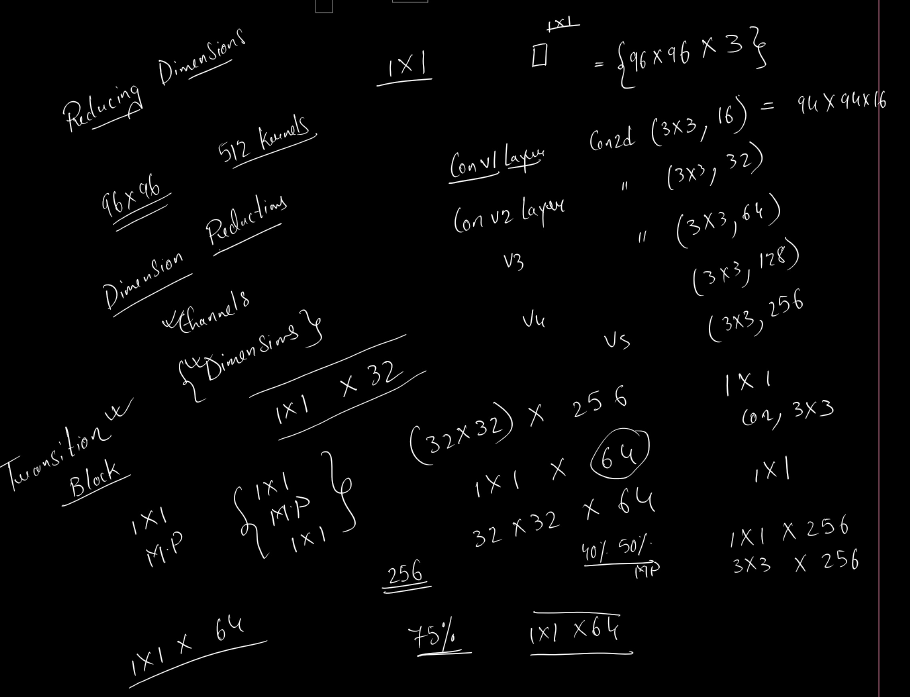

* when using input images, make sure you have some info to extract from, at least 200x200,  good sizes are 256x256, 
* they use 38x38x512, 19x19x1024 and they use this info for classificantion
* in the SSD we send info directly form convolutions  to detection, the first info is sent for conv5
* in general we go from edge/gradients(conv1) to patterns(conv2) to textures(conv3) to parts of objects(conv4) to objects(conv5)
* the more deconvolution we do the more the feature maps are
* they use 8732 default boxes and from them they get the bounding boxes of multiple scale and multiple aspect ratios

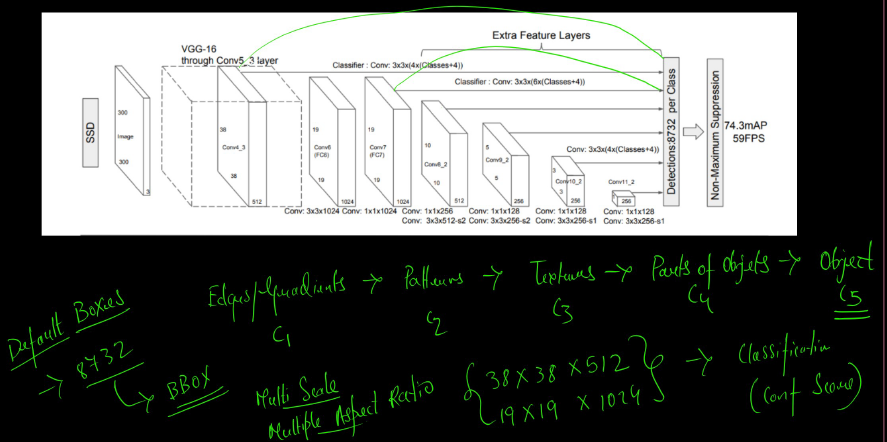

* lets assume it can be seen the same person in three different scale and aspect ratio boxes (for example)
* the camero to object distance always matters, the model will expect always certain distance base in the info found during the learning process 
* VGG can not detect small things, in that case RESNET is better for small things
* you can solve this issue by using data augmentation
* scale values 0.9, 0.5, 0.3, 2, 3
* aspect ratio values 16:9, 9:16, 1:1. etcc
* it is always good to give a lot of info to your model rather than restricting it, you need to teach the model what is wrong and what is right, this way it will work better
* use data augmentation to deal with imbalance in a dataset for CNN
* you can take 1000 good sample data and use augmentation to reach 10k for your projects
* you can input a higher resolution image to your model, lets say 640x640 input for a 320x320 model, what will happen is that  the model internally will downgrade your input image to match the one of the model.

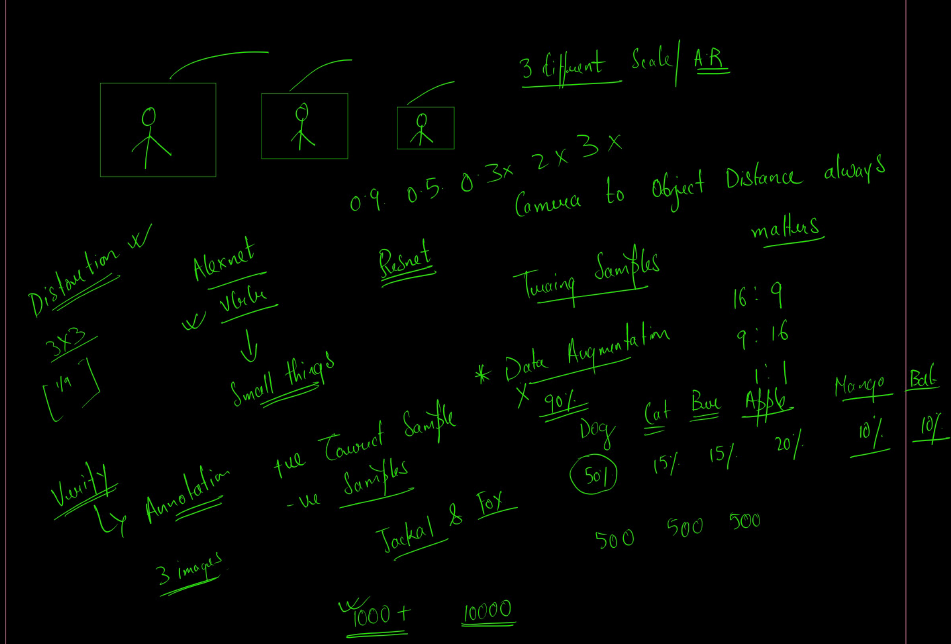

* SSD is simple relative to methods that require object proposals because it completely eliminastes proposal generation. in contrast to  the RCNN family uses region proposal (edge boxes/ selected search) which helps you to find if there is an object or not
* ssd is faster because the skip the object proposal step

* after the conv5_3 layer they use 38x38x4,  they use 4 bounding boxes or 6 bounding boxes which are of different scales

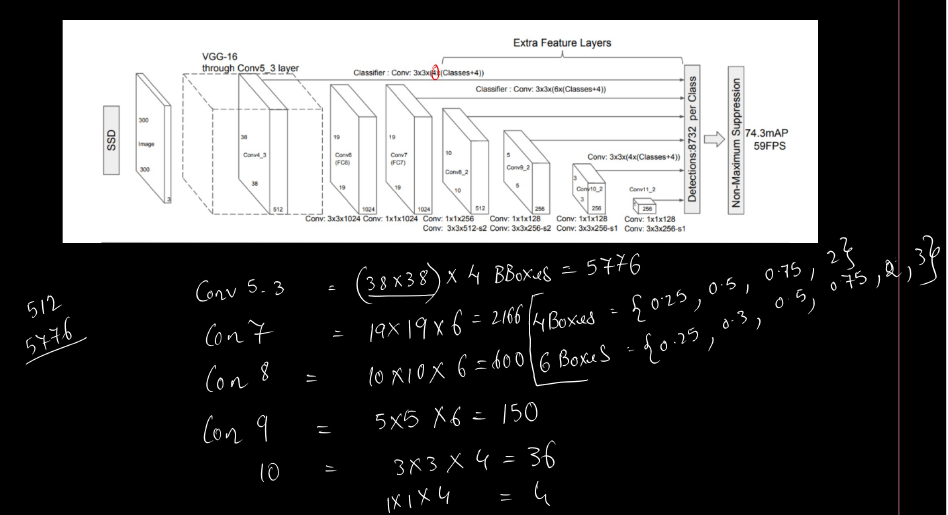

## atrous convolutions

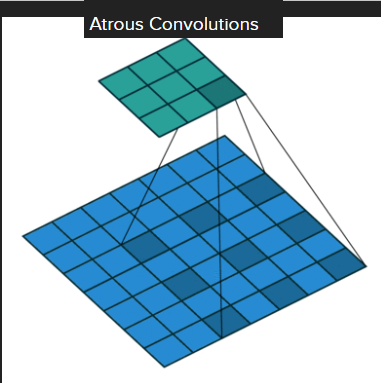

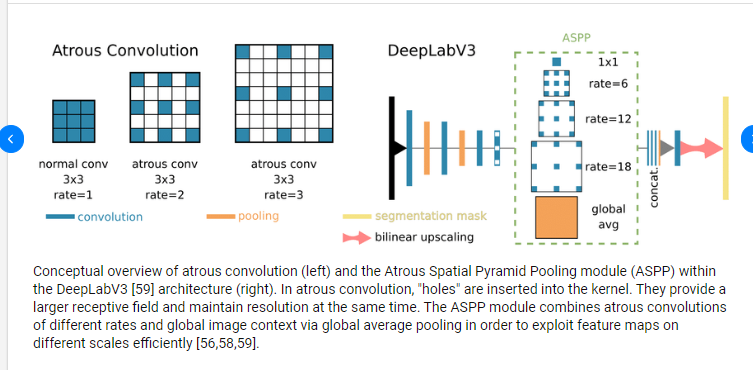